# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [51]:
%%shell
jupyter nbconvert --to html ///"content/PYF_Project_LearnerNotebook_FullCode (1).ipynb"

[NbConvertApp] Converting notebook ///content/PYF_Project_LearnerNotebook_FullCode (1).ipynb to html
[NbConvertApp] Writing 1657371 bytes to /content/PYF_Project_LearnerNotebook_FullCode (1).html


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/python for ML/project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print(f'data contains {df.shape[0]} rows and {df.shape[1]} columns')

data contains 1898 rows and 9 columns


#### Observations: There are 1898 rows and 9 columns in this dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Data contains 5 numerical columns and 4 object type columns.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the any of the columns


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
* Minimum time to prepare food is 20 minutes
* It takes about 27 minutes to prepare food on average
* Maximum time to prepare the food is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
print('ratings in the dataset',df['rating'].unique())
df[df['rating']=='Not given'].shape[0]

ratings in the dataset ['Not given' '5' '3' '4']


736

#### Observations:
736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### 1. Observations on order_id

In [10]:
df['order_id'].nunique()

1898

All order ids are unique.
There are no duplicate rows in the database

#### 2. Observations on customer_id

In [11]:
df['customer_id'].nunique()

1200

There are 1898 orders and 1200 customers, which means most of the customers placed an order only once

#### 3. Observations on restaurant_name

In [12]:
df['restaurant_name'].nunique()

178

There are 178 restaurants in the data set

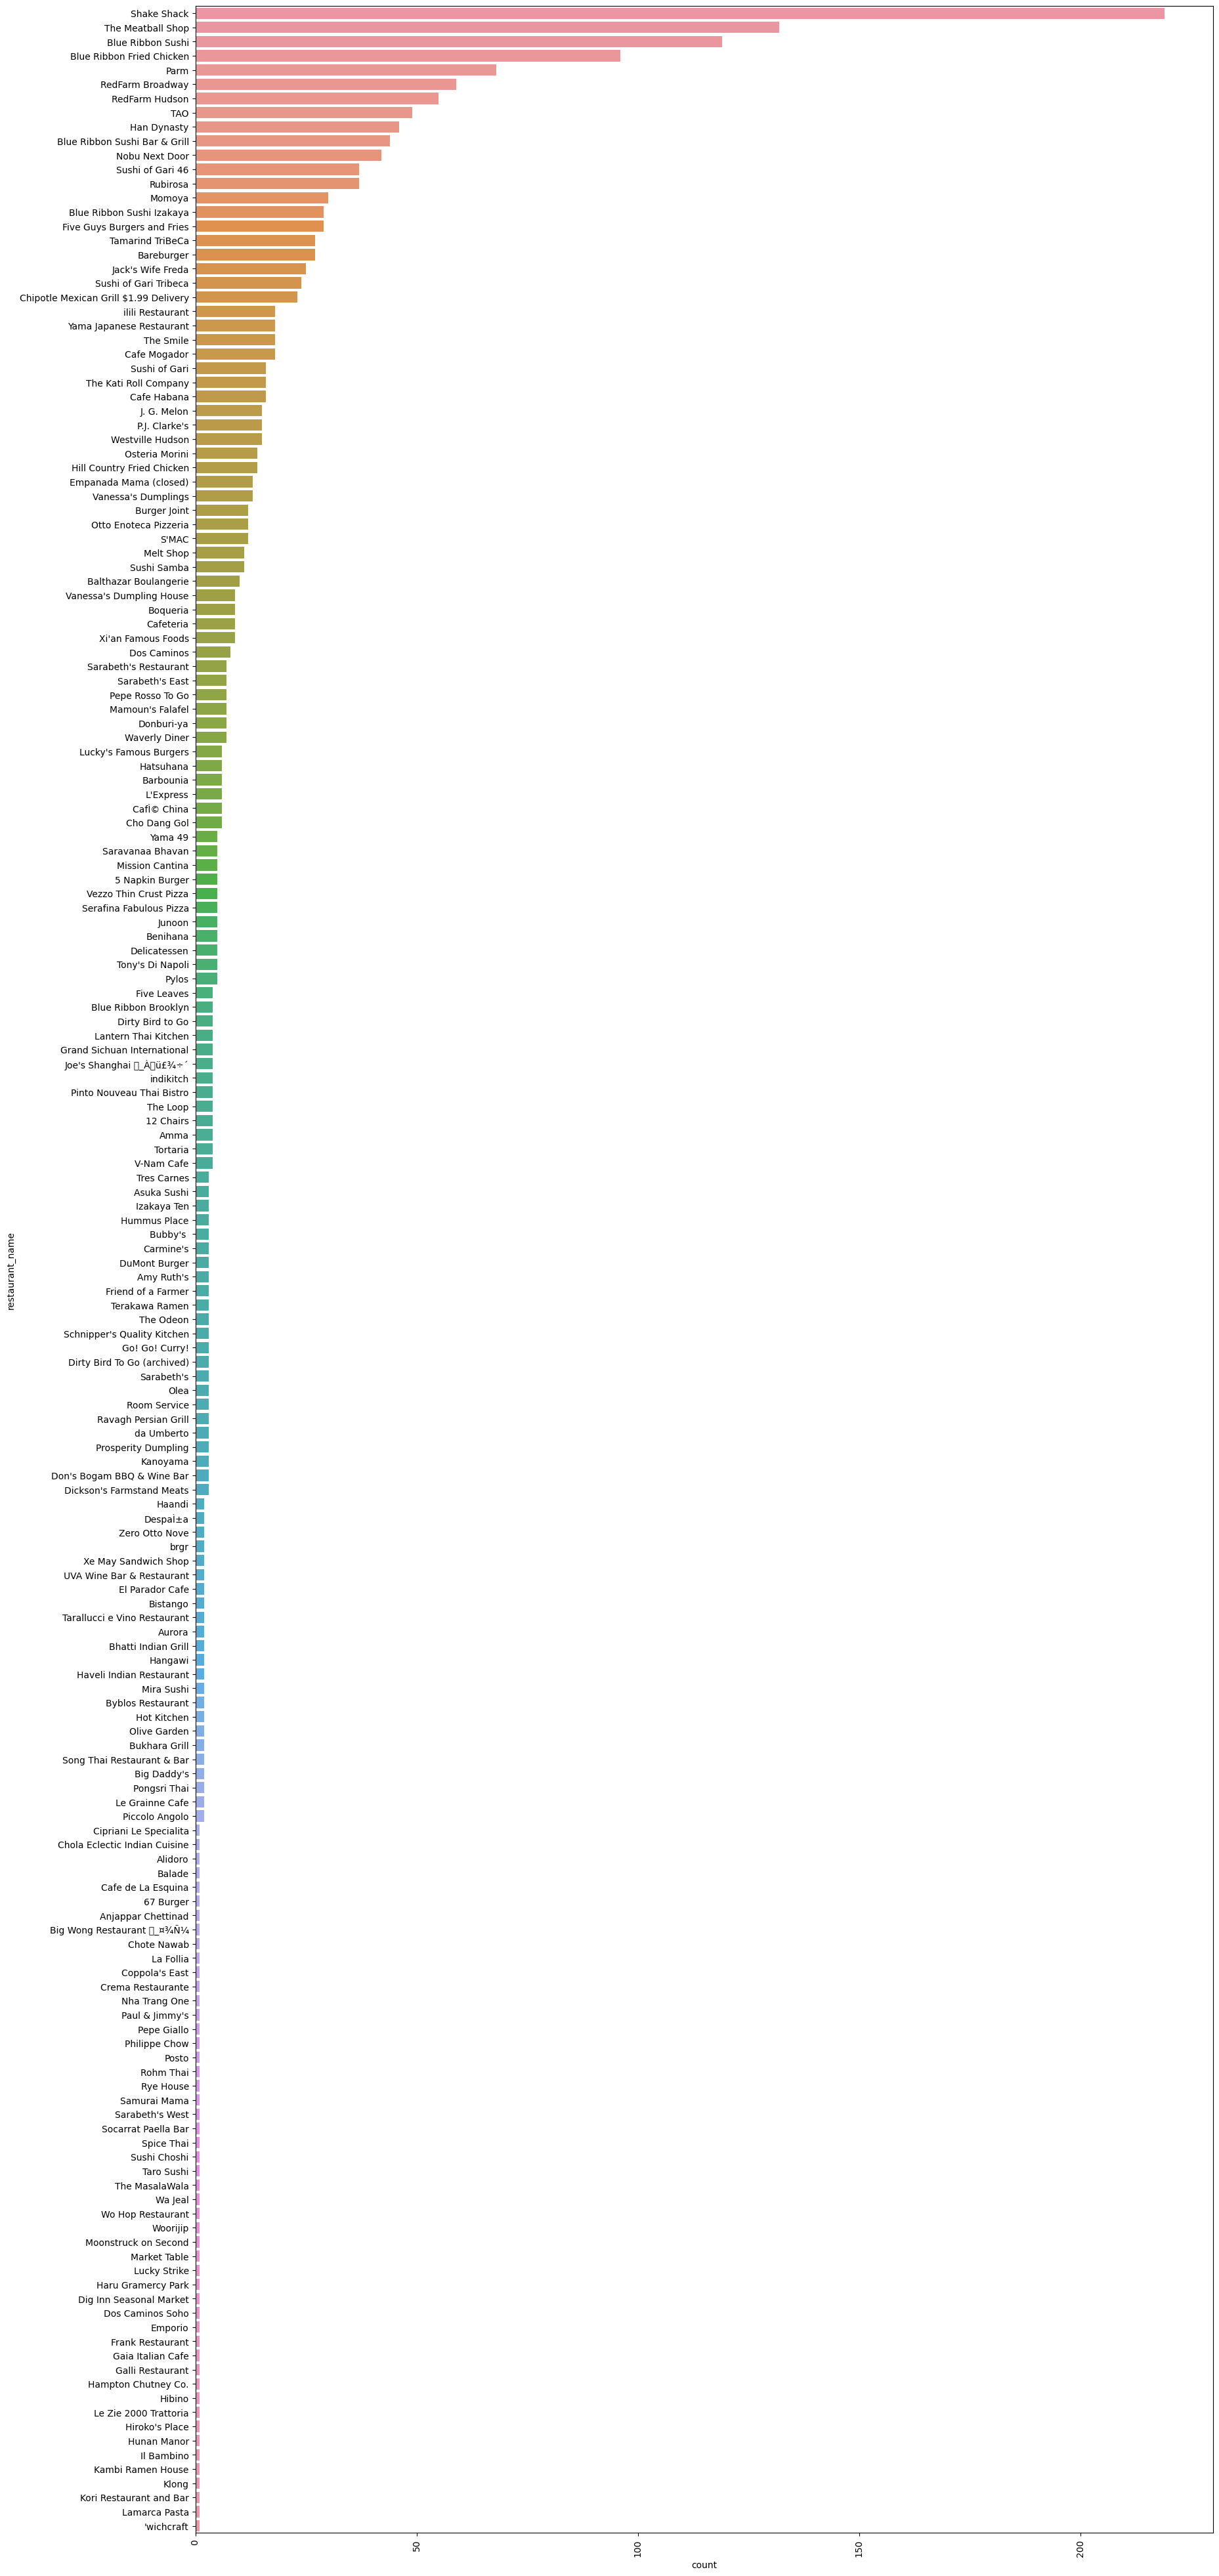

In [13]:
large_to_small = df.groupby('restaurant_name').size().sort_values().index[::-1]

plt.figure(figsize=(20,50))
sns.countplot(data=df,y='restaurant_name', order=large_to_small)
plt.xticks(rotation=90)
plt.show()

* Out of 178 restaurants in the data set, four restaurants are much more popular than the others: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken.

#### 4. Observations on cuisine_type

In [14]:
df['cuisine_type'].nunique()

14

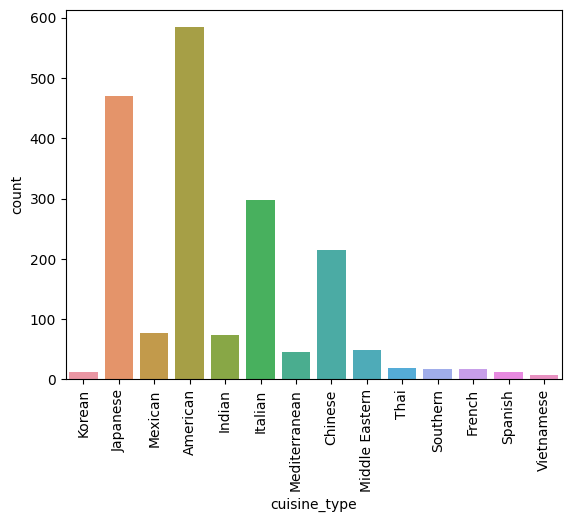

In [15]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()


Observations:
* There are 14 different cuisines in this dataset
* The most popular cuisines are American, Japanese, Italian, and Chinese.
* Vietnamese, Korean, and Spanish are the least popular
* There is a big difference in the number of orders for the most popular cusines vs less popular

#### 5. Observations on cost of the order

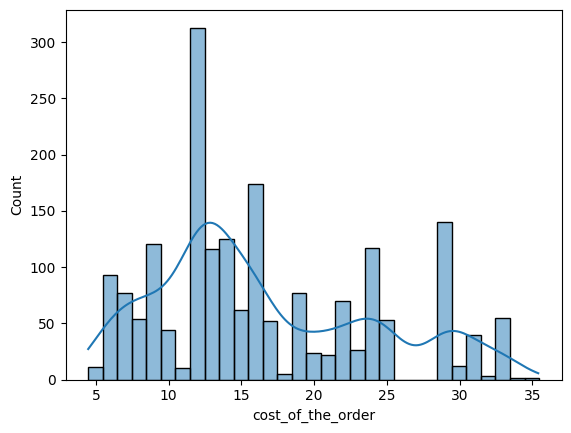

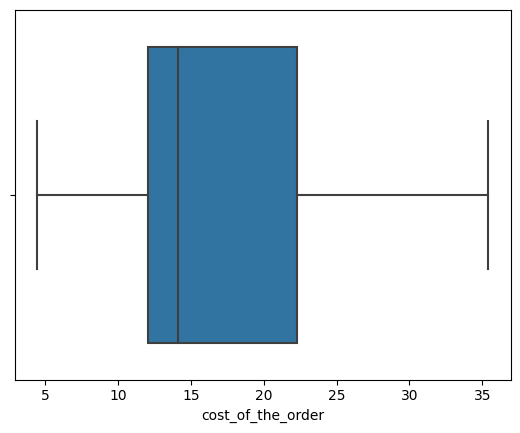

In [16]:
# Write the code here
sns.histplot(data=df,x='cost_of_the_order', binwidth=1, kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [17]:
df['cost_of_the_order'].mean()

16.498851422550054

In [18]:
df['cost_of_the_order'].median()

14.14

In [19]:
df['cost_of_the_order'].mode()

0   12.180
Name: cost_of_the_order, dtype: float64

* Most common price of the order is around 12.5 dollars
* 50% of the orders cost about 14 dollars or less
* Average order price is about 16.50 dollars
* Distribution is skewed to the right
* Seems that orders can be grouped into four different categories:
** 4.5 - 11.5
** 11.5 - 17.5
** 17.5 - 25.5
** 28.5-35.5
* There are no outliers in this column

#### 6. Observations on day_of_the_week

In [20]:
df['day_of_the_week'].nunique()

2

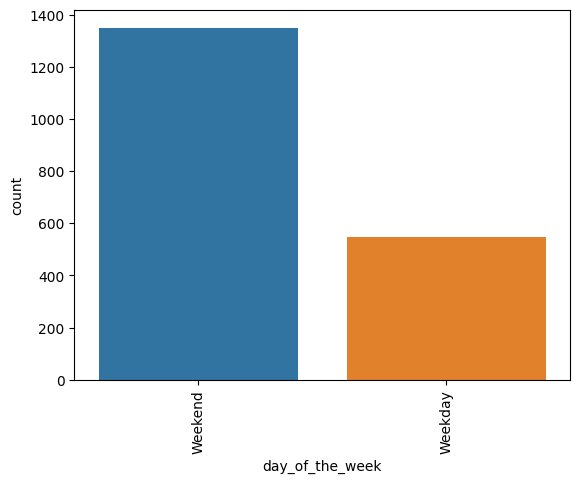

In [21]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:
* Most of the orders fall on the weekends
* The number of weekend orders is more than twice than orders placed on the weekday

#### 7. Observations on rating

In [22]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

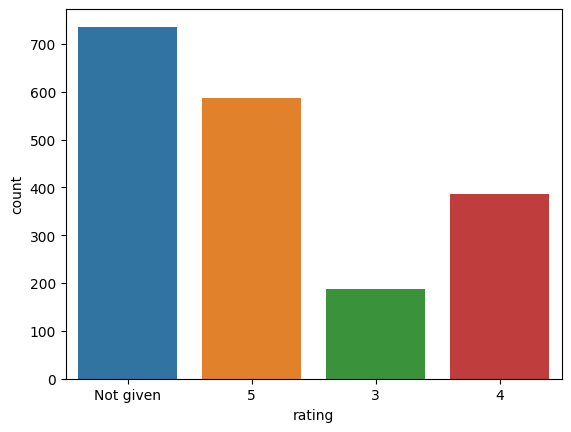

In [23]:
sns.countplot(data=df,x='rating')
plt.show()

* Most of the orders don't have a rating
* When customers do provide a rating, they often rate their orders high (4 or  5)

#### 8. Observations on food_preparation_time

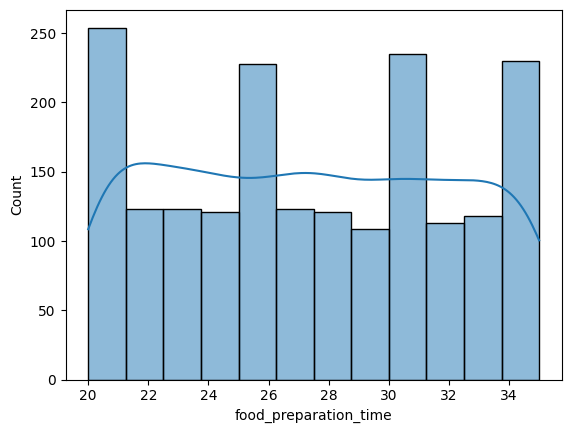

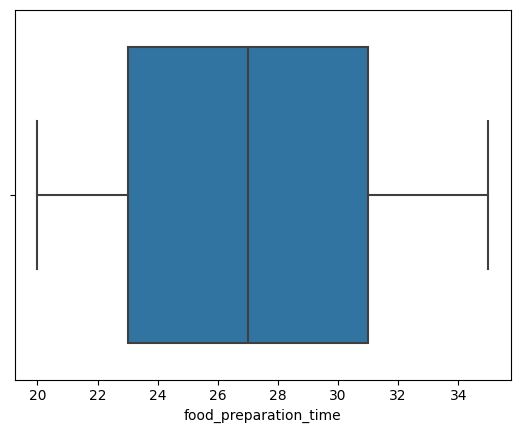

In [24]:
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

* Distribution does not appear to be skewed
* Data doesn't have any outliers
* it take 27 minutes or less to prepare 50% of the orders
* four peaks in the data: 21 minute, 26 minute, 31 minutes, and 35 minutes

#### 9. Observations on delivery_time

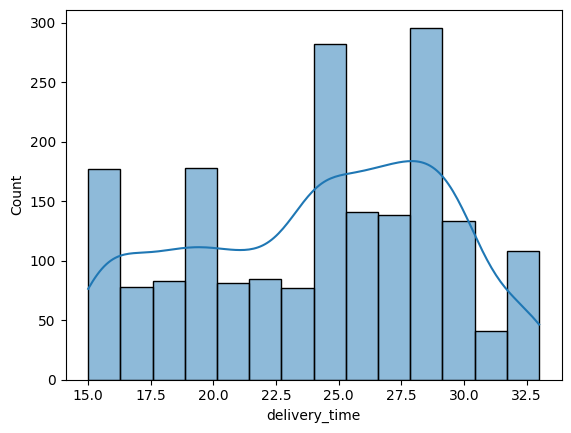

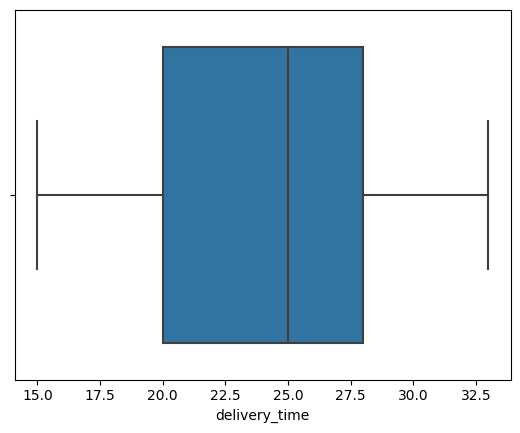

In [25]:
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

* Distribution is skewed to the left
* There are no outliers in this column
* 50% of the orders are delived in under 25 minutes
* four peaks in the data: 16 minutes, 20 minutes, 25 minutes, 29 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
df.groupby(by = ['day_of_the_week'])['cuisine_type'].value_counts()['Weekend'].head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations: American is the most popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
df[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations: 29.24% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: Orders are delivered in 24.16 minutes on average


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: Top three customers are 52832, 47440, and 83287 who placed 13, 10, 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


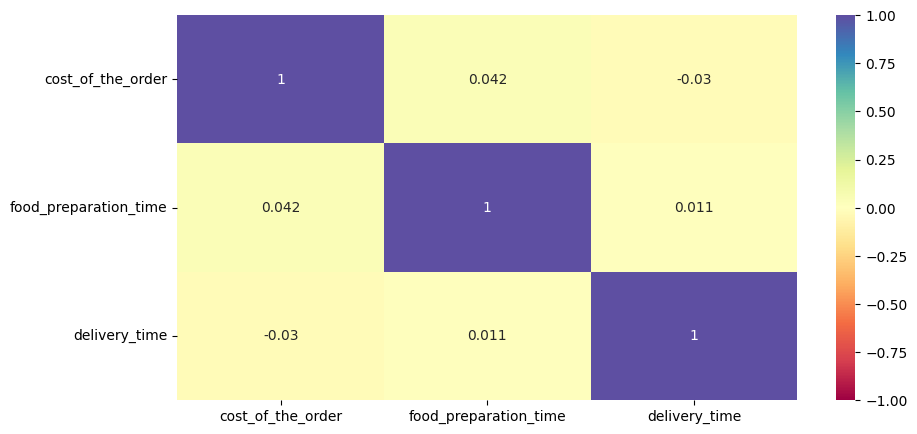

In [31]:
columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10,5))
sns.heatmap(df[columns].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show();

#### Observations:
* order_id and customer_id are not trully numeric variables, and should be excluded from correlation computation
* Numerical variables are not strongly correlated

#### Rating and Cost of the order

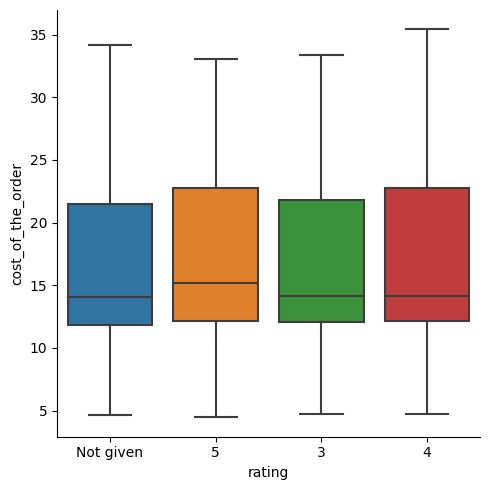

In [32]:
sns.catplot(data=df, x='rating', y='cost_of_the_order', kind='box')
plt.show()

Observations:
* There is no obious relationship between cost of the order and rating

#### Rating and Delivery Time

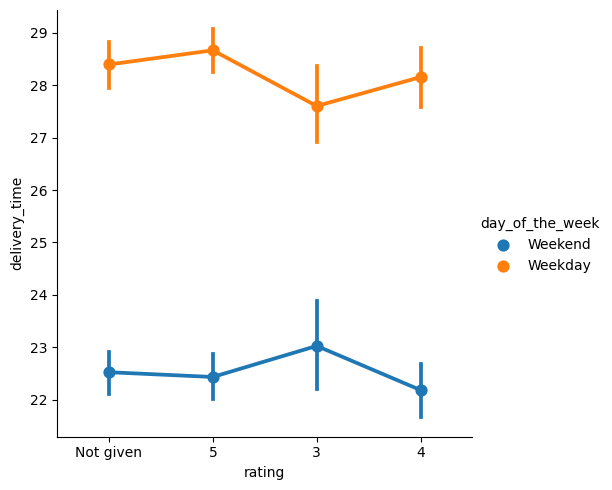

In [33]:
sns.catplot(data=df, x='rating', y='delivery_time',kind='point', hue='day_of_the_week')
plt.show()

There is no obvious relationship between rating and delivery time

#### Rating and Food prepartion time

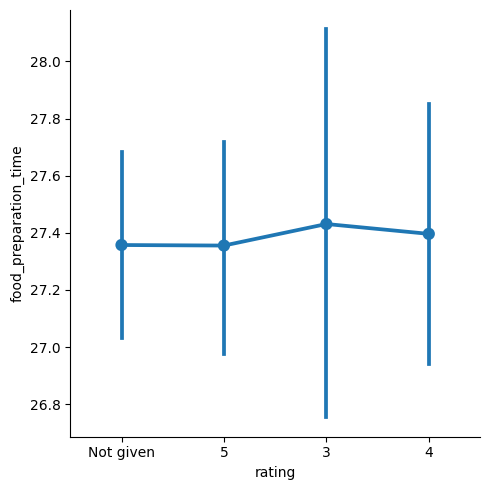

In [34]:
sns.catplot(data=df, x='rating', y='food_preparation_time', kind='point')
plt.show()

There is no obvious relationship between rating and food preparation time.

#### Cuisine and Cost of the Order

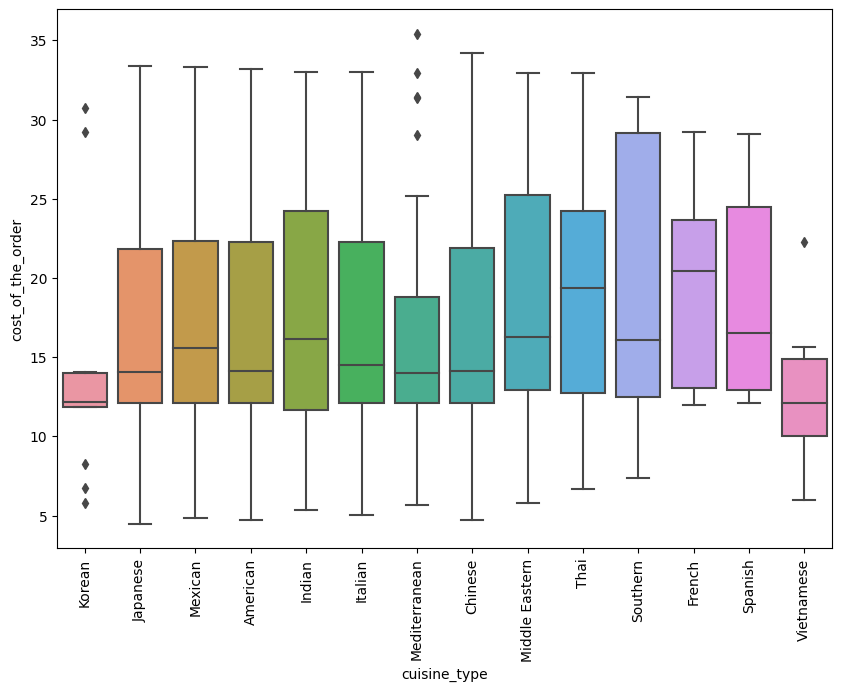

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation = 90)
plt.show()

* Order cost for Korean, Mediteranean, and Vietnamese contain outliers, and might indicate errors in the data.
* Median order cost for Thai and French cuisines are higher than for the others and are around 19-20 dollars.
* Median order cost for the most popular cuisine are around 14 dollars.

#### Cuisine and Food Preparation Time

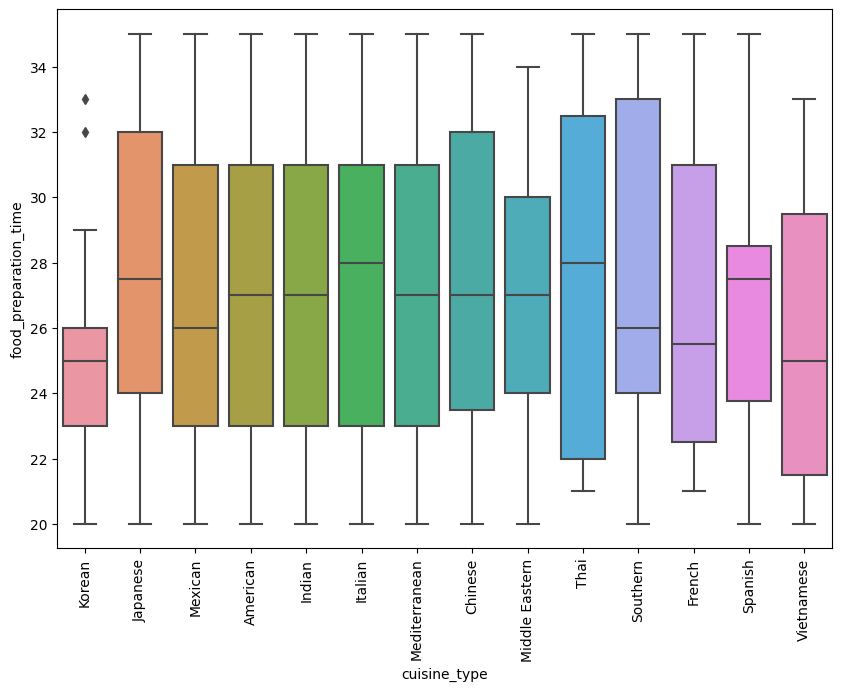

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 90)
plt.show()

#### Day of the Week vs Delivery time

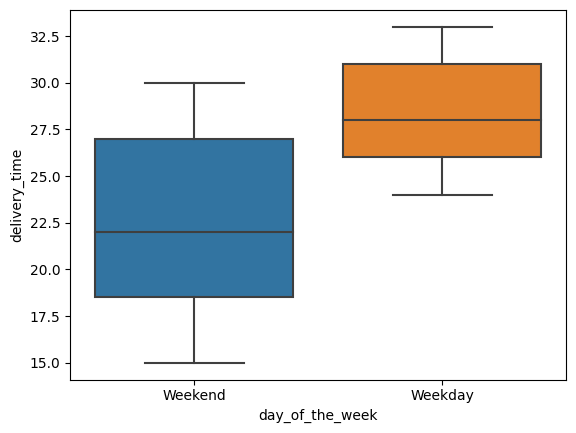

In [37]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

Delivery time is significantly shorter on the weekend vs the weekday

#### Revenue generated by restaurants

In [38]:
df_revenue = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
df_revenue.head(10)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Name: cost_of_the_order, dtype: float64

In [39]:
df_revenue.head(10).sum()

14546.49

In [40]:
df_revenue.tail(10).sum()

73.0

* Revenue generated by the most popular restaurant - Shake Shack is about 3.5 times larger than revenue of fiths popular restaurant - Parm.
* Revenue of the Red Farm Broadway and Red Farm Hudson are similar to the Parm.
* Revenue generated by the top 10 restaraunts is about 200 times larger than revenue generated by the bottom 10.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
df_temp = df.copy()
df_temp['rating'] = df_temp['rating'].replace(['Not given'],np.nan)

# changing the data type to float
df_temp['rating'] = df_temp['rating'].astype(float)

In [42]:
# drop any row with missing rating
df_no_na = df_temp.drop(df_temp[df_temp['rating'].isnull()].index).reset_index(drop=True)

In [43]:
df_restaraunt_ratings = pd.DataFrame({'restaurant_name':df_no_na['restaurant_name'],'rating':df_no_na['rating']})

In [44]:
# compute the number of ratings for each restaurant
v = df_restaraunt_ratings.restaurant_name.value_counts()

In [45]:
# get the names of restaurants with more than 50 ratings, and compute the mean rating.
df_50 = df_restaraunt_ratings[df_restaraunt_ratings.restaurant_name.isin(v.index[v.gt(50)])]
df_50.groupby('restaurant_name').mean().sort_values(by='rating', ascending=False)

,rating
restaurant_name,
The Meatball Shop,4.512
Blue Ribbon Fried Chicken,4.328
Shake Shack,4.278
Blue Ribbon Sushi,4.219


#### Observations: There are four restaurants that satisfy the criteria for promotion: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [46]:
# Delivery charge for orders that are more than 5 dollars is 15%, orders that cost more than 20 dollars incur an additonal 10% delivery charge
df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15 + df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.10

6166.303

#### Observations: Company's revenue is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
df[df['total_time'] > 60]['total_time'].count()/df.shape[0]*100


10.537407797681771

#### Observations: Approximately 10.5 % take more than an hour to deliver


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
df.groupby('day_of_the_week')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.000,28.340,2.891,24.000,26.000,28.000,31.000,33.000
Weekend,1351.000,22.470,4.629,15.000,18.500,22.000,27.000,30.000


In [49]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

#### Observations: Mean delivery time is 6 minutes smaller on the weekends despite larger number of orders


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The most popular cuisines are American, Japanese, Italian, and Chinese.
* The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
* Most of the orders are placed on the weekends
* Delivery time on the weekend tend to be smaller than on the weekday
* Ratings appear not to depend on cost, or food preparation, or delivery time. All of the orders were not rated, this could have hidden some patterns.
* Most of the customers placed an order only once
* 29.24% of the orders cost more than 20 dollars
* 50% of the orders cost about 14 dollars or less


### Recommendations:

* The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The next two restaurants with a similar revenue are RedFarm Broadway and RedFarm Hudson.
* Company should focus on increasing number of repeat customers (for example coupons for second or third order).
* Most of the demand falls on the weekends, company shoud ensure delivery drivers availability.
* Build a model to predict optimal pricing and optimize the revenue
* More data needs to be procured for ratings, specific days of the week, and restaurant location to get additional insights on demand.

---